# ML T-Generation Занятие 3: Линейная регрессия.
# Проблема переобучения. Кросс-валидация и регуляризация.

Авторы: Гаркавый Андрей (andrewgarkavyy@gmail.com), Кирилл Васильев (kirivasile@yandex.ru)

Переработал: Чайников Константин (chainikov.k.m@gmail.com)

## 0. План

1. Линейная регрессия

2. Приближение многочленом

3. Переобучение

4. Выводы

5. Разделение на тренировочную и тестовую части

6. Кросс-валидация

7. Как подбираются коэффициенты

8. Регуляризация



## 1. Линейная регрессия
**Регрессией** называется задача машинного обучения с учителем, в которой у нас есть много объектов с признаками, у которых надо научиться приближенно предсказывать значение целевой функции, которая равна какому-то **действительному числу**. 

В этом будет отличие задачи регрессии от задачи классификации - регрессия предсказывает число, а классификация - один из нескольких классов.**Текст, выделенный полужирным шрифтом**

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
model = LinearRegression(fit_intercept=True  )

Давайте положим в X какие-то трехмерные векторы.

In [3]:
X = np.ones((200,3))

X[:,1]*=np.random.normal(0,1,(200,))
X[:,2]*=np.random.normal(0,1,(200,))
X

array([[ 1.00000000e+00,  5.35749445e-01,  2.13600102e+00],
       [ 1.00000000e+00, -1.00232241e+00,  7.37260682e-03],
       [ 1.00000000e+00, -1.04114334e+00,  1.04502923e+00],
       [ 1.00000000e+00, -4.88033335e-01, -1.02095336e+00],
       [ 1.00000000e+00,  6.25508669e-01, -5.42795041e-01],
       [ 1.00000000e+00, -6.72865584e-01, -8.84963478e-01],
       [ 1.00000000e+00, -1.04638969e+00, -8.72920578e-01],
       [ 1.00000000e+00, -3.28880508e+00, -8.00242659e-01],
       [ 1.00000000e+00,  9.99693321e-01, -5.84450594e-01],
       [ 1.00000000e+00,  4.54203394e-01, -1.30402723e+00],
       [ 1.00000000e+00,  8.90084449e-01,  6.88194751e-01],
       [ 1.00000000e+00, -5.17235546e-01, -7.84437844e-01],
       [ 1.00000000e+00,  1.00585821e+00,  1.92860865e-01],
       [ 1.00000000e+00,  1.68107383e-01, -2.45702265e-01],
       [ 1.00000000e+00,  5.12950559e-01, -6.65720273e-01],
       [ 1.00000000e+00, -9.23951486e-01, -7.21243363e-01],
       [ 1.00000000e+00, -1.79926054e+00

Построим $y$ по такой формуле:

$$y = 50 + 14x_1 - 7x_2  + \varepsilon$$

Где $\varepsilon$ - это какой-то шум с нормальным распределением с дисперсией 5, чтобы линейная формула не была уж совсем точной.

In [4]:
y = X @ np.array([50,14,-7]) + np.random.normal(0,5,(200,))
y

array([38.33811982, 25.71807544, 28.01417378, 52.2145593 , 60.0247759 ,
       41.16268713, 38.35209084, 16.12402742, 73.13587389, 68.99045462,
       57.54686391, 53.78557066, 65.52720514, 54.5444063 , 57.1745973 ,
       41.93038418, 20.3395488 , 52.91519314, 45.33619145, 63.50435254,
       75.16185001, 22.58866698, 59.30818315, 53.73583128, 60.63874751,
       50.01267967, 59.0743412 , 26.50665283, 38.09827847, 47.18047385,
       71.99181753, 47.73847509, 66.87879122, 52.14915204, 69.44021668,
       55.31772064, 40.92137007, 54.26685011, 32.23898724, 39.45875713,
       28.1872483 , 42.48264121, 30.59771934, 38.89921496, 42.49358817,
       75.24855406, 41.68819648, 64.54178434, 50.44503732, 86.22522892,
       39.49317037, 66.28777438, 68.35989613, 61.27440182, 29.60078652,
       51.67326739, 54.388668  , 65.56902321, 86.49857996, 68.37287895,
       42.50590922, 43.61970791, 32.93435522, 38.24761817, 60.00115136,
       52.20858638, 58.04336225, 52.8228802 , 55.00952753, 74.92

Теперь обучим на этих данных линейную регрессию и посмотрим, сможет ли она восстановить параметры модели $50, 14, -7$.

In [5]:
model.fit(X[:,[1,2]], y)

LinearRegression()

In [6]:
coefs = model.coef_
coefs

array([13.63107638, -6.60944935])

In [7]:
const = model.intercept_
const

50.6269215803926

In [8]:
np.linalg.inv(X.T @ X) @ X.T @ y 

array([50.62692158, 13.63107638, -6.60944935])

In [9]:
# X = np.ones((200,3))
# X[:,1]*=np.random.normal(0,1,(200,))
# X[:,2]*=np.random.normal(0,1,(200,))

# y = X @ np.array([50,14,-7]) + np.random.normal(0,5,(200,))

In [10]:
import plotly.express as px
import plotly.graph_objects as go


fig = px.scatter_3d(np.concatenate((X,y.reshape(-1,1)), axis=1),  x=1, y=2, z=3,
                    size_max=5, opacity=0.5, color_discrete_sequence=['red'])

# tight layout
fig.update_layout(margin=dict(l=10, r=100, b=100, t=10))

x1 = np.linspace(-3, 3, 30)
y1 = np.linspace(-3, 3, 30)
xx, yy = np.meshgrid(x1, y1)
z = np.c_[xx.ravel(), yy.ravel()] @ np.array(coefs[0:2]) + const 

# transpose
z = z.reshape(xx.shape)
fig.add_traces(go.Surface(x=x1, y=y1, z=z, showscale=False,
                          opacity=0.3, colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']]))
fig.show()

И внезапно линейная регрессия как-то примерно угадала наши коэффициенты! Примерно, потому что мы добавили шум.

Как она это делает? Сейчас узнаем.

### КАК работает линейная регрессия

По сути мы хотим подобрать числа $a_0, a_1, a_2, a_3$ для вот такой модели:

$$f(x_1, x_2, x_3) = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3$$

Мы хотим подобрать их так, чтобы функция потерь на наших данных была минимальна. В LinearRegression используют функцию потерь MSE - сумму квадратов отклонений от настоящего значения.

То есть задача такая:

$$\sum\limits_{i=1}^{n}(f(x_{i1}, x_{i2}, x_{i3}) - y_i)^2 \rightarrow \min$$


$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)^2 \rightarrow \min$$

Где n - это количество входных данных. Давайте рассмотрим эту сумму как функцию от 4 переменных $a_0, a_1, a_2, a_3$, которую нам нужно минимизировать. А числа $x_{ij}$ и $y_i$, получается, будут обычными константами.

$$MSE(a_0, a_1, a_2, a_3) \rightarrow \min$$

Давайте посчитаем частную производную по каждой координате.

Начнем с координаты $a_1$.

$$MSE'_{a_1}(a_0, a_1, a_2, a_3) = \sum\limits_{i=1}^{n}((a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)^2)'_{a_1}=$$

Раскрываем квадрат, вынося отдельно члены, которые делятся на $a_1^2$, $a_1$ и $1$.

$$= \sum\limits_{i=1}^{n}(x_{i1}^2a_1^2 + 2x_{i1}(a_0 + a_2 x_{i2} + a_3 x_{i3} - y_i)a_1 + (a_0 + a_2 x_{i2} + a_3 x_{i3} - y_i)^2)'_{a_1}=$$

Считаем производную, одна из скобок при этом обнуляется:

$$= \sum\limits_{i=1}^{n}(2x_{i1}^2a_1 + 2x_{i1}(a_0 + a_2 x_{i2} + a_3 x_{i3} - y_i))=$$

Теперь вынесем $2$ и $x_{i1}$

$$= 2\sum\limits_{i=1}^{n}(x_{i1}a_1 + a_0 + a_2 x_{i2} + a_3 x_{i3} - y_i)x_{i1}=$$

Заметим, что в скобках получилось очень простое выражение!

$$= 2\sum\limits_{i=1}^{n}(f(x_{i1}, x_{i2}, x_{i3}) - y_i)x_{i1}$$

Давайте приравняем все 4 производные (по $a_0, a_1, a_2, a_3$) нулю, тогда:

$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i) = 0$$
$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)x_{i1} = 0$$
$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)x_{i2} = 0$$
$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)x_{i3} = 0$$

Давайте сгруппируем все выражения по $a_0, a_1, a_2, a_3$:

$$na_0 + (\sum\limits_{i=1}^{n}x_{i1})a_1 + (\sum\limits_{i=1}^{n}x_{i2})a_2 + (\sum\limits_{i=1}^{n}x_{i3})a_3= \sum\limits_{i=1}^{n}y_i$$

$$(\sum\limits_{i=1}^{n}x_{i1})a_0 + (\sum\limits_{i=1}^{n}x_{i1}^2)a_1 + (\sum\limits_{i=1}^{n}x_{i1}x_{i2})a_2 + (\sum\limits_{i=1}^{n}x_{i1}x_{i3})a_3= \sum\limits_{i=1}^{n}x_{i1}y_i$$

$$(\sum\limits_{i=1}^{n}x_{i2})a_0 + (\sum\limits_{i=1}^{n}x_{i1}x_{i2})a_1 + (\sum\limits_{i=1}^{n}x_{i2}^2)a_2 + (\sum\limits_{i=1}^{n}x_{i2}x_{i3})a_3= \sum\limits_{i=1}^{n}x_{i2}y_i$$

$$(\sum\limits_{i=1}^{n}x_{i3})a_0 + (\sum\limits_{i=1}^{n}x_{i1}x_{i3})a_1 + (\sum\limits_{i=1}^{n}x_{i2}x_{i3})a_2 + (\sum\limits_{i=1}^{n}x_{i3}^2)a_3= \sum\limits_{i=1}^{n}x_{i3}y_i$$

Ура, мы получили красивую симметричную систему уравнения, 4 уравнения, 4 неизвестных. Если определитель матрицы коэффициентов не равен нулю, то у него есть ровно одно решение, и его мы умеем находить (методом Гаусса, например). Если определитель вдруг стал равен нулю, то решений либо 0, либо бесконечно.

У непрерывно-дифференцируемой функции, которая при стремлении по каждой координате к плюс или минус бесконечности сама стремится к плюс бесконечности, всегда существует глобальный минимум. В точке глобального минимума все производные как раз равны нулю. Следовательно, существует всегда хотя бы одно решение, и мы его найдем.

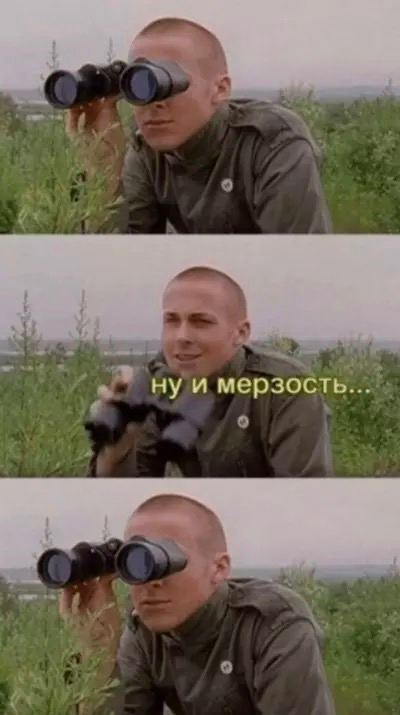

## 2. Приближение одномерной функции многочленом

Начнем с простой задачи.


1) Есть функция $f(x)$, но мы ее не знаем.

2) Зато мы знаем ее значения в $m$ точках (они называются тренировочным множеством):
$$f(x_1) = y_1$$
$$\cdots$$
$$f(x_m) = y_m$$
3) Нужно научиться приблизительно восстанавливать эту функцию.

Самый простой способ - научиться приближать её многочленом, а именно давайте подберем такие коэффициенты $a_0, a_1, \ldots, a_n$, чтобы многочлен $P(x) = a_0 + a_1x + a_2x^2 + \ldots + a_nx^n$ был как можно ближе к $f(x)$.

Но что такое "приблизить"? Мы знаем лишь значения в $m$ точках, так что в лучшем случае она должна проходить через все эти точки (хотя скоро мы увидим, что это не так).

В этом случае обычно пытаются минимизировать сумму квадратов ошибок во всех точках, то есть **функцию потерь** $$Q(P) = \sum_i (P(x_i) - f(x_i))^2 $$

Эту величину называют **MSE** - Mean Squared Error (средняя квадратичная ошибка).

Тут может возникнуть вопрос, почему мы берем именно сумму квадратов, а не, например, сумму модулей. Однозначного ответа на этот вопрос нет, наиболее удачный ответ, пожалуй такой: у суммы квадратов есть много удобных свойств, например это выпуклая, дифференцируемая функция. Тем не менее иногда другой выбор может быть оправданным. Если вам интересно чуть больше понять про смысл этих условий, можете решить такие задачи:

**(0.5 балла) Доп. Задача 1.** Найдите число m такое, что для заданных $x_i$ сумма $\sum|m - x_i|$ минимальна

Если $\sum|m - x_i|$ = $\sum|x_i - m|$ и  $\sum\limits_{i=1}^{n}|x_i - m| = min$, то ответ -- медиана (сумма абсолютных величин отклонений возможных значений случайной величины от медианы, умноженных на соответствующие вероятности, меньше, чем от любой другой величин)

**(0.5 балла) Доп. Задача 2.** Найдите число m такое, что для заданных $x_i$ сумма $\sum(m - x_i)^2$ минимальна

Возьмём производную по m, получим $2\sum\limits_{i=1}^{n}(m - x_i) = 0$ -> $m = (2\sum\limits_{i=1}^{n} x_i)/n$ – среднее

Сейчас можно их и пропустить.


Сначала просто нарисуем какой-нибудь многочлен, например $f(x) = 3x^3 - 2x^2 + x$ на отрезке $[-1, 1]$:

In [11]:
def f(x):
    return 3 * x ** 3 - 2 * x**2 + x

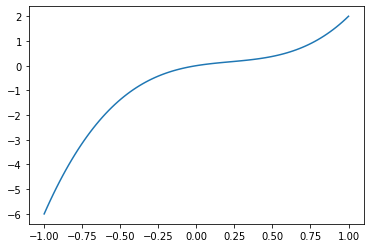

In [12]:
x100 = np.linspace(-1, 1, 100)
plt.plot(x100, f(x100))
plt.show()

Теперь зададим набор точек (10 штук) и посмотрим что будет, если подобрать по ним коэффициенты нашего многочлена:

In [13]:
x = np.linspace(-1, 1, 10)  # 10 точек на отрезке [-1, 1]
y = f(x)
coefs = np.polyfit(x, y, deg = 2)
coefs

array([-2.00000000e+00,  3.17037037e+00, -5.61733355e-16])

(это означает многочлен $-2x^2 + 3.17037 x$)

numpy позволяет легко работать с многочленами, заданными их коэффициентами. Мы можем создать из них объект poly1d, который можно будет просто вызывать для получения нужных значений:

In [14]:
poly = np.poly1d(coefs)
poly(0), poly(1), poly(2)

(-5.617333549722722e-16, 1.1703703703703718, -1.6592592592592534)

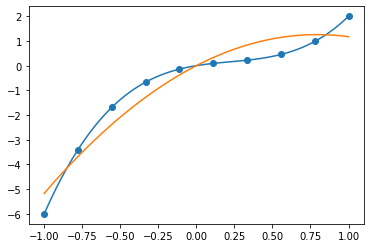

In [15]:
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

Довольно ожидаемо, наша функция (оранжевая) не очень похожа на то, что мы искали (синяя). Наверное зря мы пытаемся приблизить кубическую функцию многочленом второй степени. Давайте попробуем 3-ю степень.

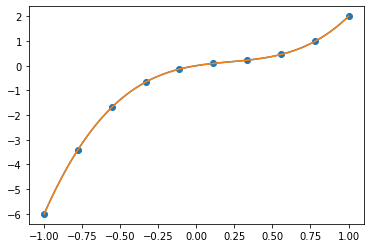

In [16]:
coefs = np.polyfit(x, y, deg = 3)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

На этот раз мы в точности угадали функцию. Можете проверить, что если увеличивать степень многочлена, результат не меняется: более высокие степени тут просто не нужны.

Но мы сейчас жили в идеальном мире. На практике чаще всего известные нам значения не совсем точны. Давайте добавим к значениям нашей функции немного шума:

In [17]:
def f_real(x):
    return 3 * x ** 3 - 2 * x**2 + x + np.random.normal(0, 1, x.shape)

In [18]:
x.shape

(10,)

In [19]:
x = np.linspace(-1, 1, 10)
y = f_real(x) # + np.random.normal(0, 0.5, 10)  # случайный шум

In [20]:
x100 = np.linspace(-1, 1, 100)

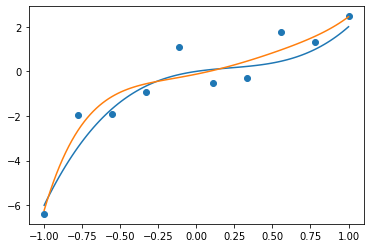

In [21]:
coefs = np.polyfit(x, y, deg = 5)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

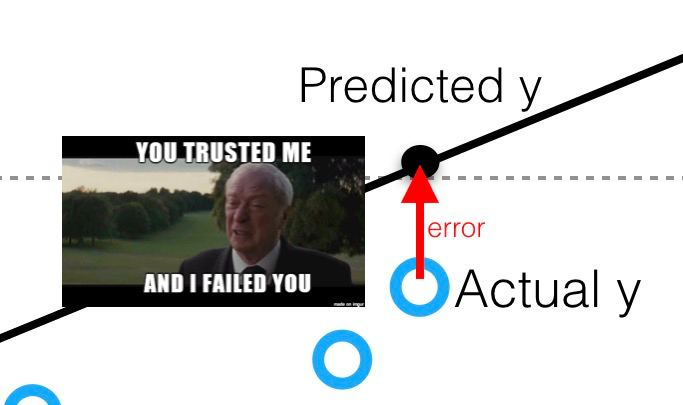

Теперь мы почти попали. Перед тем как читать дальше, подумайте над заданием.

**(1 балл) Обязательное задание 1:** попробуйте увеличить степень полинома. Что произойдет с графиком нашего приближения? Посмотрите  как обе функции себя ведут вне интервала x. Попробуйте сформулировать проблему, с которой мы столкнулись.

**Очевидно, что при увеличении степени многочлена наша модель сильно подогналась под под исходные точки, но вне заданного отрезка сильно ассцилирует, то есть мы столкнулись с проблемой *переобучения***

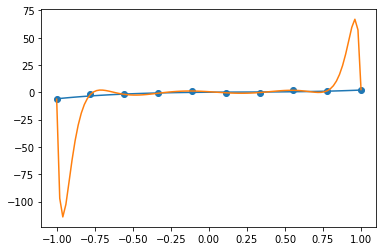

In [22]:
# Место для решения
coefs = np.polyfit(x, y, deg =  50)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

## 3. Переобучение

То, что вы увидели при решении этого задания называется в машинном обучении **переобучением** (overfittig).

Если мы используем достаточно сложную модель (то есть модель, у которой много параметров, в нашем случае -- многочлен достаточно высокой степени), то у модели появляется возможность "выучить" все точки, которые она видела. Например, если задано $m$ точек, всегда можно подобрать многочлен степени $m-1$, который через них проходит (если вы не знакомы с этим фактом, можете подумать, как его доказать).


"Честный" способ проверять качество нашей апроксимации -- **смотреть точность в точках, которые мы не использовали при подборе многочлена**. Это множество часто называют тестовым множеством. Давайте зададим его так:

In [23]:
# возьмем 10 случайных точек от 0 до 1
x_test = np.random.random(10) 

# превратим их в 10 случайных точек от -1 до 1
x_test = 2 * x_test - 1
x_test

array([-0.81769501,  0.72135799, -0.66010012,  0.27389997,  0.32097719,
        0.76051378, -0.82586383,  0.85037563, -0.41275658, -0.68327304])

**(1 балл)  Обязательное задание 2:** напишите функцию, которая для данного многочлена считает его качество на тестовом множестве (то есть среднеквадратичное отклонение между значениями функции $f$ и многочлена $P$ на тестовой выборке).

Вы все прошлое занятие изучали разные функции, попробуйте сделать MSE как можно более компактной функцией (желательно в одну строчку).

In [24]:
# y_real - это np.array c реальными значениями в точках
# y_pred - это np.array c предсказанными нами значениями в точках
# они одной длины
def MSE(y_real, y_pred):
   return np.dot((y_real - y_pred).T, (y_real - y_pred)) / y_real.shape[0]

In [25]:
# сравниваем с коробкой
from sklearn.metrics import mean_squared_error

y_real = np.array(np.arange(5))
y_pred = np.array(np.arange(5, 10))[::-1]

print(mean_squared_error(y_real, y_pred))
print(MSE(y_real, y_pred))

33.0
33.0


**(1 балл) Обязательное задание 3:** нарисуйте график зависимости ошибки на тестовом множестве от степени многочлена. При какой степени ошибка минимальна?


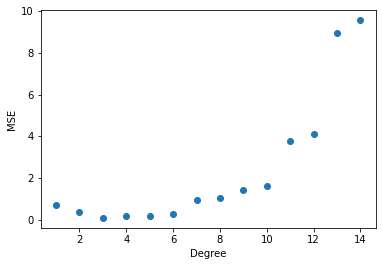

In [26]:
degrees = [i for i in range(1, 15)]
errors = []
for i in degrees:
    coefs = np.polyfit(x, y, i)
    poly = np.poly1d(coefs)
    errors.append(MSE(f(x100), poly(x100)))
plt.scatter(degrees, errors)
plt.xlabel('Degree') 
plt.ylabel('MSE')
plt.show()

**По графику видно, что ошибка меньше всего при 3 степени**

**(1 балл) Доп. задача 5:** как меняется график, если увеличивать количество точек в множестве, на котором мы подбираем многочлен?

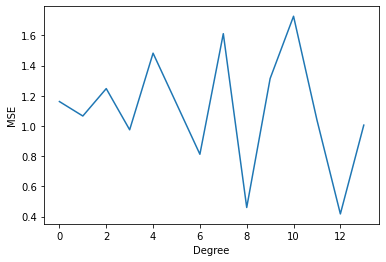

In [27]:
degrees = [i for i in range(1, 15)]
errors = []

x = np.linspace(-1, 1, 250)
y = f(x)

for i in degrees:
    coefs = np.polyfit(x, y, i)
    poly = np.poly1d(coefs)
    errors.append(MSE(f_real(x_test), poly(x_test)))
plt.plot(errors)
plt.xlabel('Degree') 
plt.ylabel('MSE')
plt.show()

**При увеличении количества точек MSE будет меньше, поскольку модель чаще угадывает точки**

## 4. Выводы

1. Цель машинного обучения с учителем - приблизить **целевую функцию** (target) по её значениям (возможно приблзительным) в некоторых точках.

В нашем случае - это $f(x) = 3x^3 - 2x^2 + x$. Обычно она, конечно, никому неизвестна.

2. Множество точек с известным значением функции называется **тренировочным множеством** (train).

В нашем случае - это 10 точек, выбранных равномерно на отрезке $[-1, 1]$.

3. Чтобы приблизить функцию, нужно использовать какую-то **модель** (model), приближающую функцию.

В данном случае - это многочлен $P(x) = a_0 + a_1x + a_2x^2 + \ldots + a_nx^n$.

4. Мы выбираем **функцию потерь** (loss function) для сравнения результатов модели и реальных значения на тренировочном множестве. Чем она меньше, тем лучше наша модель.

В данном случае - это $MSE = \sum_i (P(x_i) - f(x_i))^2$.

5. У модели есть **параметры**, которые мы выбираем так, чтобы функция потерь на тренировочном множестве была минимальна.

В данном случае - это коэффициенты многочлена ($a_0, a_1, \ldots, a_n$). Выбираются они с помощью пока магической для нас функции polyfit.

6. У модели есть **гиперпараметры**, которые мы выбираем сами.

В данном случае - это степень многочлена (число $n$).

7. Однако такой подход с минимизацией функции потерь может привести к тому, что мы идеально приблизим функцию на тренировочном множестве, но она будет абсолютно отличаться во всех остальных точках. Это явление называется **переобучением**.

В данном случае - мы видели, что если степень многочлена большая (больше трех), то мы попадаем во все точки, но при этом сам многочлен сильно отличается от $f(x)$.

8. Чтобы бороться с переобучением, полезно выделить **тестовое множество** точек, в которых мы тоже знаем результаты функции. Оно никак не используется при обучении модели, и нужно только для валидации результата.

В данном случае - мы взяли рандомные 10 точек на отрезке $[-1, 1]$.

9. В идеальном случае функция потерь на тренировочном и тестовом множестве не отличается. А вот если на тренировочном функция потерь получается гораздо меньше, чем на тестовом, то это говорит о том, что происходит переобучение.

Действительно, при большой степени MSE близка к или равна нулю на тренировочном множестве, а на тестовом множестве нет.

10. Единственный пока способ, который мы знаем, чтобы влиять на переобучение - это перебирать **гиперпараметры** модели так, чтобы **минимизировать функцию потерь на тестовом множестве**.

Действительно, если выбрать степень 3, то функция потерь окажется минимальной на тестовом множестве, как мы видели в задании 3.

## 5. Разделение на тренировочную и тестовую части

Если вы решите поучаствовать в каком-нибудь соревновании по машинному обучению, вы увидите, что тестовое множество вам недоступно (иначе было бы неинтересно: очень легко обучиться предсказывать то, что ты уже видел).

В реальной жизни обычно тоже считают, что на тестовом множестве можно провериться один раз -- в самом конце. Иначе вы начнете подкручивать гиперпараметры глядя на результат на тестовой выборке и, сами того не замечая, переобучитесь.

Как поступать в такой ситуации? Придется пожертвовать частью точек, которые даны нам для обучения и использовать их для подбора гиперпараметров в нашем алгоритме (в нашем случае это степень многочлена).

То есть придется из точек, у которых мы знаем результаты, убрать, например, 10% в тестовое множество.

Функция для этого есть, например, в пакете sklearn

In [28]:
X = np.linspace(-1, 1, 50)
y = f_real(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [30]:
X_train, y_train

(array([ 0.83673469,  0.3877551 , -0.42857143,  0.14285714, -0.95918367,
        -0.18367347,  0.46938776, -0.14285714, -0.34693878, -0.3877551 ,
         0.63265306, -0.87755102,  0.75510204,  0.71428571, -0.06122449,
         0.2244898 ,  1.        ,  0.18367347,  0.95918367,  0.55102041,
         0.59183673,  0.02040816, -1.        , -0.30612245, -0.91836735,
        -0.71428571,  0.34693878, -0.10204082,  0.26530612, -0.2244898 ,
         0.51020408,  0.87755102,  0.67346939, -0.75510204,  0.79591837,
         0.10204082, -0.02040816, -0.83673469,  0.42857143, -0.63265306,
        -0.26530612,  0.06122449, -0.55102041, -0.46938776, -0.51020408]),
 array([ 3.09064667,  0.12313645, -1.05613168,  1.42869113, -4.4285552 ,
        -0.35082869,  0.14077897,  0.88185152, -2.06168064, -1.47099439,
         1.40188287, -3.93933032,  2.15850916,  2.17665084,  0.13341635,
         0.36066195,  2.09180207,  0.50671571,  3.1332933 , -0.31251103,
         0.72879272, -0.79782848, -6.6203463 ,  0

In [31]:
X_test, y_test

(array([-0.79591837,  0.30612245, -0.59183673,  0.91836735, -0.67346939]),
 array([-3.56112454,  0.45726131, -1.9536925 ,  0.38741893, -1.61143573]))

## 6. Кросс-валидация

Также есть более точный способ проводить валидацию результата. Если разделить множество один раз на тестовое и тренировочное, то это может значительно влиять на результат. Вдруг в тестовое множество случайно попали такие точки, в которых предсказать значение тяжелее или легче, чем обычно?

Тогда можно применить **кросс-валидацию** - давайте разделим множество на 10 примерно равных частей, тогда у нас есть 10 разделений на тренировочное и тестовое множество - как тестовое множество выберем по очереди каждую из этих частей, а как тренировочное выберем все остальные части. В итоге, все элементы множества побывают и в тренировочной, и в тестовой чати.

Можно посчитать результат на каждом из 10 разбиений и просто усреднить результат.


In [32]:
# Есть вот такая удобная штука
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    print(test_index, train_index)

[0 1 2 3 4] [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[5 6 7 8 9] [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[10 11 12 13 14] [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[15 16 17 18 19] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[20 21 22 23 24] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[25 26 27 28 29] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[30 31 32 33 34] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

**(1 балл) Доп. задача 6:** проделайте все вышеописанное с функцией $f(x) = \frac{1}{1 + e^{-x}}$ на отрезке $[-3, 3]$. Как оптимальная степень зависит от количества точек, по которым вы подбираете многочлен?

1. Построить заданную функцию

2. Взять 10 точек от -3 до 3 и приближать её полиномом разной степени, построить график ошибки

3. Взять 10 случайных точек от -3 до 3 и посмотреть ошибку на этих точках полиномиальных функций обученных по пункту 2 (т.е. взять тренировочные точки для обучения из пункта 2, а тестировать случайными точками) построить график.

4. Добавить в функцию случайный шум и проделать пункты 2 и 3 для неё.

5. Увеличить количество тренировочных(только тренировочных) точек с 10 например до 20 40 60. И проделать пункты 2 и 3, для этих сэмплов

6. Сделать выводы.

In [33]:
# место для решения

In [34]:
def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

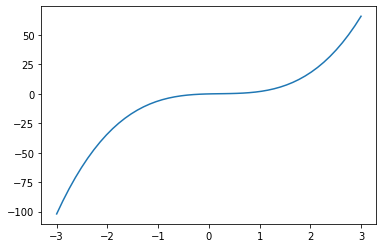

In [35]:
sigm = np.linspace(-3, 3, 50)
plt.plot(sigm, f(sigm))

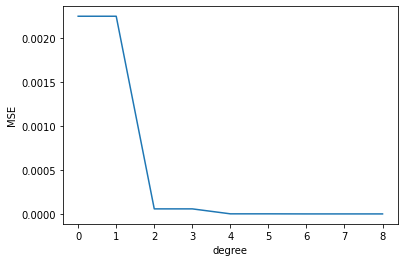

In [36]:
x = np.linspace(-3, 3, 10)
y = sigmoid(x)
errors = []
for i in range(1, 10):
    coefs = np.polyfit(x, y, i)
    poly = np.poly1d(coefs)
    errors.append(MSE(sigmoid(x), poly(x)))
plt.plot(errors)
plt.xlabel('degree') 
plt.ylabel('MSE') 
plt.show()



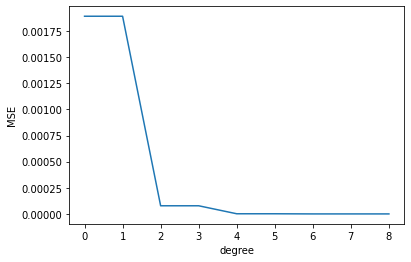

In [37]:

x_test = np.random.random(10)
errors = []
for i in range(1, 10):
    coefs = np.polyfit(x, y, i)
    poly = np.poly1d(coefs)
    errors.append(MSE(sigmoid(x_test), poly(x_test)))
plt.plot(errors)
plt.xlabel('degree') 
plt.ylabel('MSE') 
plt.show()

In [38]:
def sigmoid_noise(x):
    return  1 / (1 + np.exp(-x) + np.random.normal(0, 0.01))

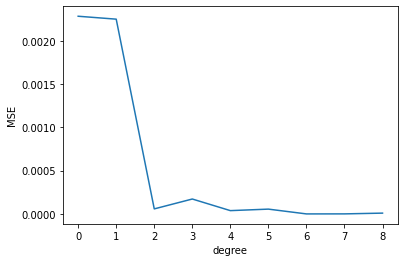

In [39]:
x = np.linspace(-3, 3, 10)
y = sigmoid_noise(x)
errors = []
for i in range(1, 10):
    coefs = np.polyfit(x, y, i)
    poly = np.poly1d(coefs)
    errors.append(MSE(sigmoid_noise(x), poly(x)))
plt.plot(errors)
plt.xlabel('degree') 
plt.ylabel('MSE') 
plt.show()

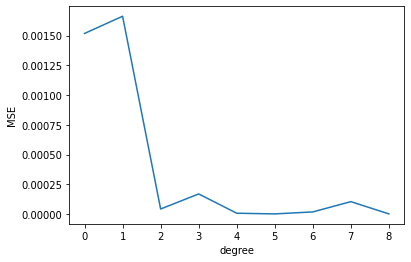

In [40]:
x_test = np.random.random(10)
errors = []
for i in range(1, 10):
    coefs = np.polyfit(x, y, i)
    poly = np.poly1d(coefs)
    errors.append(MSE(sigmoid_noise(x_test), poly(x_test)))
plt.plot(errors)
plt.xlabel('degree') 
plt.ylabel('MSE') 
plt.show()

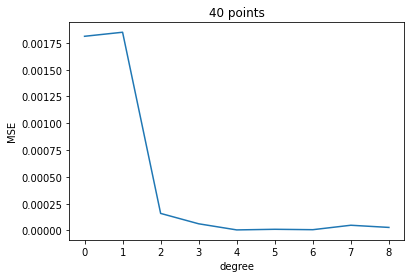

In [41]:
x = np.linspace(-3, 3, 40)
y = sigmoid_noise(x)
errors = []
for i in range(1, 10):
    coefs = np.polyfit(x, y, i)
    poly = np.poly1d(coefs)
    errors.append(MSE(sigmoid_noise(x), poly(x)))
plt.plot(errors)
plt.xlabel('degree') 
plt.ylabel('MSE') 
plt.title("40 points")
plt.show()

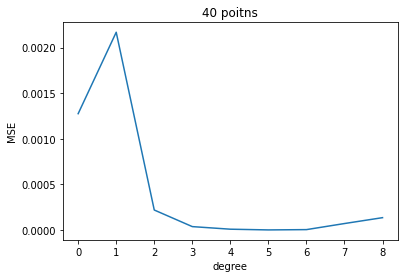

In [42]:
errors = []
for i in range(1, 10):
    coefs = np.polyfit(x, y, i)
    poly = np.poly1d(coefs)
    errors.append(MSE(sigmoid_noise(x_test), poly(x_test)))
plt.plot(errors)
plt.xlabel('degree') 
plt.ylabel('MSE') 
plt.title("40 poitns")
plt.show()

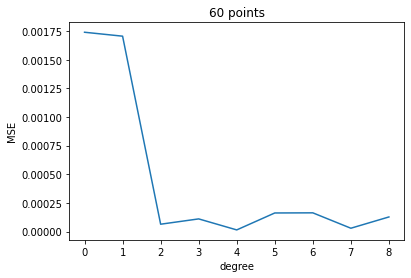

In [43]:
x = np.linspace(-3, 3, 60)
y = sigmoid_noise(x)
errors = []
for i in range(1, 10):
    coefs = np.polyfit(x, y, i)
    poly = np.poly1d(coefs)
    errors.append(MSE(sigmoid_noise(x), poly(x)))
plt.plot(errors)
plt.xlabel('degree') 
plt.ylabel('MSE') 
plt.title("60 points")
plt.show()

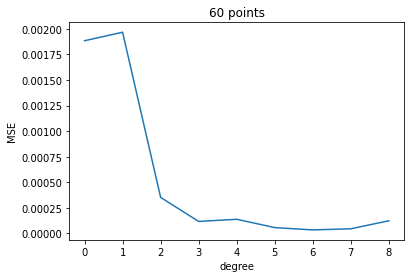

In [44]:
errors = []
for i in range(1, 10):
    coefs = np.polyfit(x, y, i)
    poly = np.poly1d(coefs)
    errors.append(MSE(sigmoid_noise(x_test), poly(x_test)))
plt.plot(errors)
plt.xlabel('degree') 
plt.ylabel('MSE') 
plt.title("60 points")
plt.show()

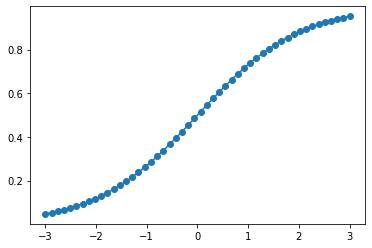

In [45]:
x_train = np.linspace(-3, 3, 50)
x_test = np.random.random(10)
plt.scatter(x_train, sigmoid(x_train))
plt.plot(sigm, sigmoid(sigm))
errors = []
coefs = np.polyfit(x_train, sigmoid(x_train), 3)
poly = np.poly1d(coefs)
plt.show()
# 3 степень практически полностью приближает функцию

**При увеличении точек повышается оптимальная степень – проще попасть на нужную точку**

## 7. Линейная регрессия на реальных данных

До этого мы учились приближать одномерную функцию многочленом. Каждая точка имела ровно один признак - коодинату $x$.

Тем не менее, чаще всего в машинном обучении признаков гораздо больше. Возьмем какой-нибудь реальный датасет.

In [46]:
!pip install gdown

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [47]:
# https://drive.google.com/file/d/13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb/view?usp=sharing
!gdown --id 13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb
To: /Users/apotekhin/repositories/Sample-ML-Repo/06. Overfittng problem/Advertising.csv
100%|██████████████████████████████████████| 5.17k/5.17k [00:00<00:00, 3.94MB/s]


In [48]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


В датасете показаны результаты продаж разных товаров в зависимости от ресурсов (тысяч долларов), которые вложили в различные средства распространения информации:
* TV - реклама по телевизору
* radio - на радио
* newspapers - в газетах

Целевая переменная:

sales - продажи такого-то товара (тысячи штук)

In [49]:
# Размеры датасета
data.shape

(200, 4)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [51]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Признаков немного, поэтому давайте попробуем визуализиовать зависимость целевой переменной от каждого из признаков.

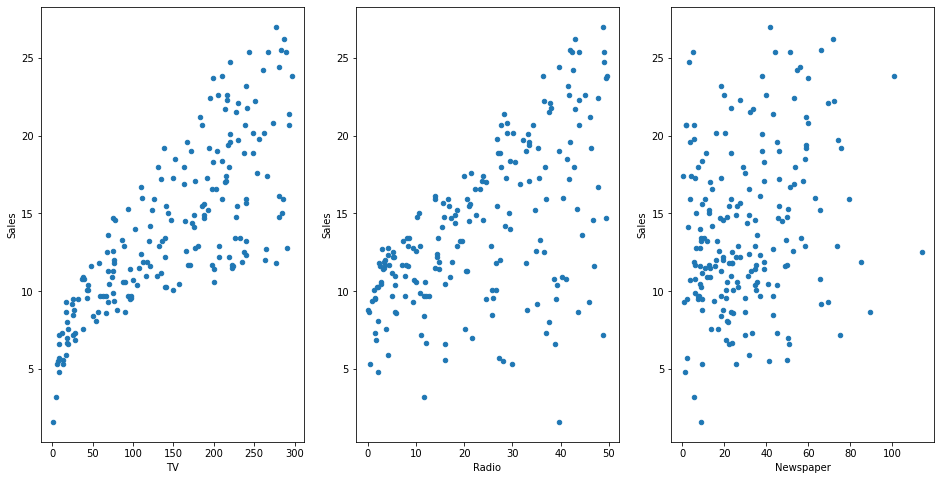

In [52]:
fig, axs = plt.subplots(1, 3,)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
plt.show()

### Простая линейная регрессия

Из графиков выше предположим, что только размер рекламы на телевизоре влияет на продажи больше всего. Формула для такого случая выглядит следующим образом:
$$y=\beta_0+\beta_1x$$
Здесь:
* $y$ - наше предсказание продаж
* $x$ - сколько денег вложили в рекламу по телевидению
* $\beta_0$ - сдвиг
* $\beta_1$ - параметр, отвечающий за важность признака x

$\beta_0$ и $\beta_1$ - это параметры нашей модели. Чтобы создать хорошую модель, надо "обучить" эти значения. Т.е. изменить их так, чтобы они хорошо работали для нашей задачи.

### Обучение коэффициентов модели

Параметры $\beta_0$ и $\beta_1$ подбираются таким образом, чтобы минимизировать **сумму наименьших квадратов ошибок**:

$$Q(MSE)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2$$

<img src="https://i.pinimg.com/originals/95/99/b0/9599b04198dc617282026d00a6e8f9d4.png">

* Фиолетовые точки на даграмме $y^{true}$ - это полученные истинные значения x и y .
* Синяя линия $y^{pred}$ - это наша модель: линия, которой мы стараемся приблизить данные .
* Красные отрезки - это ошибки нашей модели.


Как коэффициенты $\beta_0$ и $\beta_1$ соотносятся с синей линией:
* $\beta_0$ - это сдвиг нашей прямой, т.е. значение y при x = 0.
* $\beta_1$ - это тангенс угла наклона прямой.

Как искать данные коэффициенты? Есть много техник: аналитическое решение, методы основанные на градиентном спуске. Пока же достаточно знать, что многие библиотеки (в том числе и sklearn) умеют это делать. Зачем кожаному мешку напрягаться :)

In [53]:
from sklearn.linear_model import LinearRegression

# Наша модель
reg = LinearRegression()

# Подготовим данные для неё
# На вход требуется 2D матрица, а у нас только один признак,
# и надо превратить его из 1D вектора (n,) в 2D матрицу (n, 1).
# Это можно сделать с помощью метода reshape
x = data["TV"].values.reshape(-1, 1) 
y = data["Sales"].values

# Обучаем нашу модель
reg.fit(x, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
print("Массив коэффициентов={}".format(reg.coef_))

Сдвиг=7.032593549127695
Массив коэффициентов=[0.04753664]


### Интерпретируем коэффициенты
Что означает коэффициент, связанный с телевидением ($\beta_1$)?
* Дополнительные 1000 000$, вложенные на в рекламу на телевидении, позволят продажам товара вырасти где-то на 0.047 * 1000 = 47 тысяч единиц.

In [54]:
# Посчитаем ручками
7.032594 + 0.047537*1000

54.56959400000001

In [55]:
X_new = pd.DataFrame({'TV': [1000]})
X_new.head()

,TV
0,1000


In [56]:
reg.predict(X_new)

array([54.56923398])

### Нарисуем нашу прямую

In [57]:
# Возьмём предсказания для данных, на которых обучались
y_pred = reg.predict(x)
y_pred.shape

(200,)

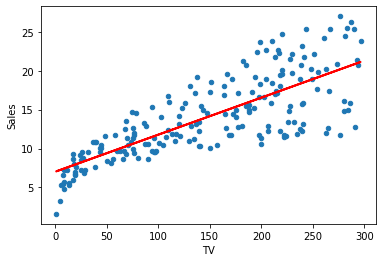

In [58]:
# Сначала выведем истинные данные
data.plot(kind='scatter', x='TV', y='Sales')

# Теперь рисуем нашу линию
plt.plot(x, y_pred, c='red', linewidth=2)
plt.show()

Посчитаем ошибку MSE на обучающей выборке:


In [59]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_pred, y))

10.512652915656757


### Используем все признаки

Простую линейную регрессию с одним признаком можно легко расширить на случай нескольких признаков:
$$y=\beta_0+\beta_1x_1+...+\beta_nx_n$$

А для нашего датасета это будет выглядеть так:
$$Sales=\beta_0+\beta_1*TV+\beta_2*radio+\beta_3*newspaper$$

Давайте опять воспользуемся sklearn, чтобы их оценить:

In [60]:
reg = LinearRegression()

X = data.drop("Sales", axis=1)
y = data["Sales"]

# Обучаем нашу модель
reg.fit(X, y)

# Коэффициенты
print("Сдвиг = {}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {} = {}".format(column, coef))

Сдвиг = 2.9388893694594103
Коэффициент для TV = 0.0457646454553976
Коэффициент для Radio = 0.18853001691820442
Коэффициент для Newspaper = -0.0010374930424763007


Вес признака отвечает также, как и в предыдущем случае за значимость этого признака. Для газет он вообще отрицательный. Вычислим ошибку на обучающей выборке.

In [61]:
y_pred = reg.predict(X)

# Ошибка теперь равна:
print(mean_squared_error(y_pred, y))

2.784126314510936


Ошибка уже меньше, чем при одном признаке, однако измерять ошибку на обучающей выборке неправильно. Помимо истинной зависимости между признаками и целевой переменной, туда могут затесаться случайности, лишние данные и прочие факторы. Если не ограничивать каким-то образом модель (об этом мы узнаем позднее), то модель легко подстраивается под эти шумы. Она начинает показывать очень хорошее качество на обучающей выборке, но когда мы попробуем посмотреть качество на других выборках, то там модель будет показывать себя плохо. Это и есть переобучение.

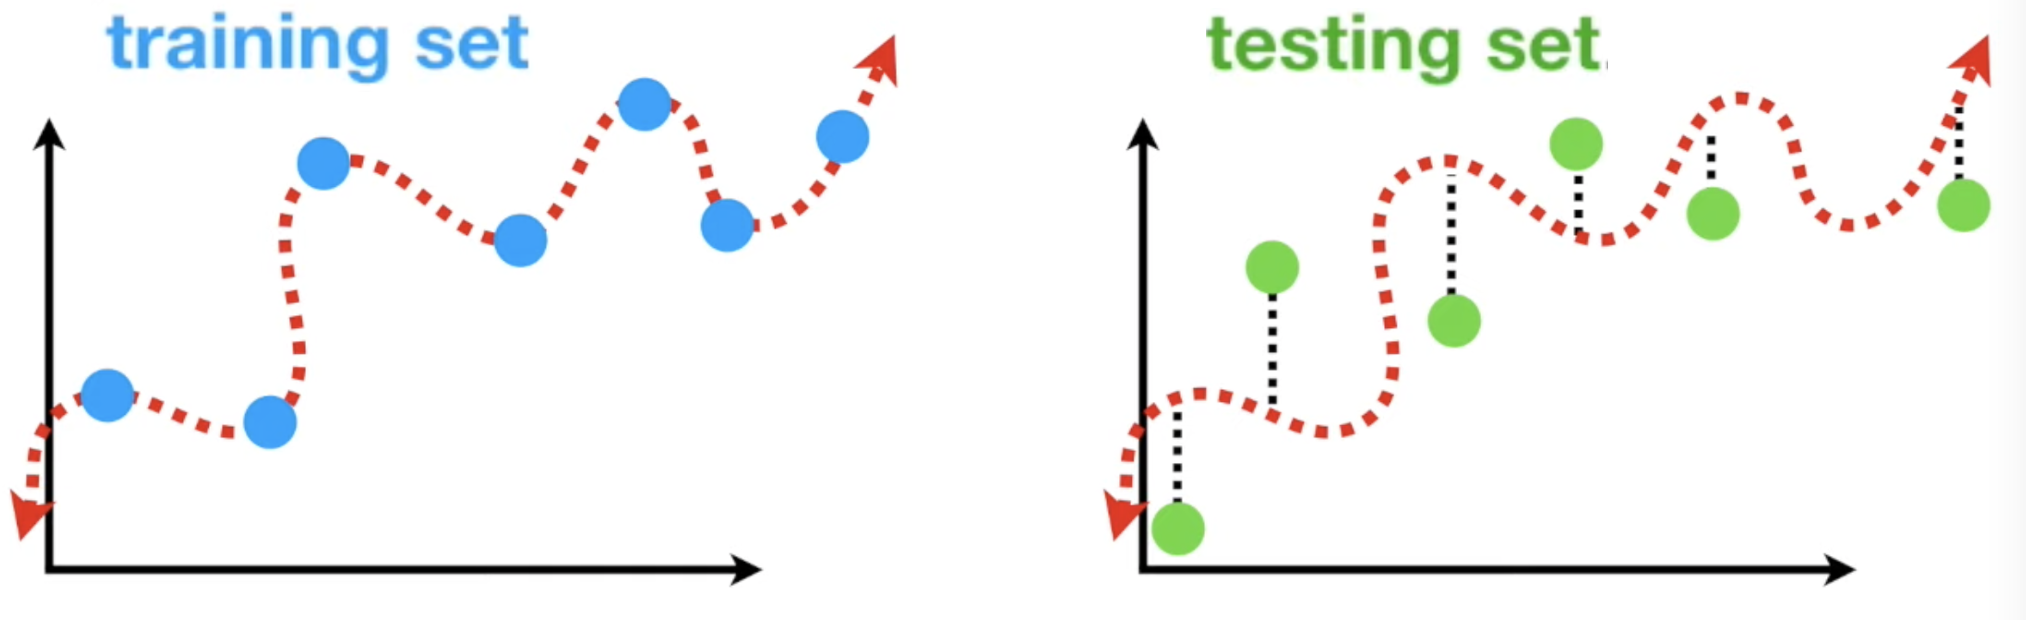

Поэтому применим кросс-валидацию:

In [62]:
# Многие выбирают k=5 для начала
k = 5
errors = []

X = data.drop("Sales", axis=1)
y = data["Sales"]

# Размер одной части
fold_size = len(X) // k


for i in range(k):
    # Берём все значения, кроме выбранной части
    X_train = X[:i * fold_size].append(X[(i + 1) * fold_size:])
    y_train = y[:i * fold_size].append(y[(i + 1) * fold_size:])
    
    # Берём выбранную часть
    X_test = X[i * fold_size:(i + 1) * fold_size]
    y_test = y[i * fold_size:(i + 1) * fold_size]
    
    # На каждой итерации обучаемся отдельно и сохраняем ошибку
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    errors.append(mean_squared_error(y_pred, y_test))
    
# Выводим ошибку на кросс-валидации
print(np.mean(errors))

3.07294659710021


In [63]:
# А можно не париться и попросить sklearn всё сделать за нас
from sklearn.model_selection import cross_val_score

# Берём с отрицательным знаком, т.к. обычно туда передаётся не функция потерь, которую надо минимизировать
# А что-то вроде "функции успеха", которую надо максимизировать
errors = -cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print(np.mean(errors))

3.07294659710021


Видно, что ошибка больше, чем тогда на обучающей выборке, поэтому есть показания думать, что это переобучение. Отчего оно обычно происходит? Мы берём слишком много лишних признаков или делаем модель слишком сложной для данной задачи. Для решения этой задачи существует регуляризация.

### Регуляризация

Регуляризация - это искусстенное занижение всех параметров моделей ($\beta_0,\beta_1,...$). Это помогает упростить модель, т.к. низкие значения $\beta_i$ означают, что модель будет выдавать результаты близкие к прямой (или гиперплоскости, если параметров много). А также зануление некоторых коэффициентов может убрать ненужные признаки из обучения. Однако как всё это сделать так, чтобы не убрать нужные признаки?

Посмотрим на функцию потерь, которую мы минимизируем:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2$$

Добавим туда слагаемое, которое поможет нам понизить значения наших $\beta_i$:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2 + \lambda \sum_{i=1}^m\beta_i^2$$

Действительно, если мы будем понижать нашу функцию потерь $L(\beta)$, то мы будем минимизировать и второе слагаемое, которое и отвечает за абсолютные величины $\beta_i$. Осталось указать, что $\lambda$ это некоторый числовой коэффициент, который позволяет играться между очень сильной и очень слабой регуляризацией. Если он большой, то регуляризация сильная и модель будет более простой, меньше переобучаться, больше недообучаться, и наоброт. 

Забыл добавить, что это была L2-регуляризация.
L1-регуляризация выглядит так:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2 + \lambda \sum_{i=1}^m|\beta_i|$$
Она отличается от L2 тем, что она обнуляет некоторые коэффициенты, а L2 пытается всё уменьшать равномерно.

В sklearn L1-регуляризация - это Lasso, а L2-регуляризация - это Ridge. Давайте посмотрим, какое качество они нам дадут на кросс-валидации.

In [64]:
# L1
from sklearn.linear_model import Lasso

reg = Lasso( ).fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Lasso(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг=3.040215583480377
Коэффициент для TV=0.04566141538001947
Коэффициент для Radio=0.18346439758868255
Коэффициент для Newspaper=0.0

Результат=3.0414058967513684


Видно, что признак с рекламой в газетах модель захотела полностью убрать из выборки.

In [65]:
# L2
from sklearn.linear_model import Ridge

reg = Ridge( ).fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг = {}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {} = {}".format(column, coef))
print()

errors = -cross_val_score(Ridge(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг = 2.9389674583301435
Коэффициент для TV = 0.04576464365801851
Коэффициент для Radio = 0.18852509681078553
Коэффициент для Newspaper = -0.001036293958907012

Результат=3.072932673298498


In [66]:
reg.coef_

array([ 0.04576464,  0.1885251 , -0.00103629])

Тут модель полностью не зануляла все признаки, а уменьшила их веса некоторых из них, а некоторых увеличила. Но изменения были столь незначительные, что качество не изменилось.

Как видно, качество не сильно улучшилось. Это всё потому что, мы не подбирали параметр параметр lambda (в моделях он называется alpha), а оставили его равным 1.0. Вот тут нам и приходит на помощь кросс-валидация.

Попробуем сначала Lasso. Давайте сначала поступим по тупому, и будем выбирать параметр lambda на обучающей выборке.

In [67]:
lambdas = np.arange(0.1, 3.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Lasso(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append((val, mean_squared_error(y_pred, y)))
    print(((val, mean_squared_error(y_pred, y))))
    

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Вычислим ошибку на кросс-валидации
# Лучшая модель
best_reg = Lasso(alpha=min_val)
cv_error = -np.mean(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]
(0.1, 2.784228685169686)
(0.30000000000000004, 2.784985993046452)
(0.5000000000000001, 2.7857256993570276)
(0.7000000000000001, 2.7868352725638887)
(0.9000000000000001, 2.7883147049707757)
(1.1000000000000003, 2.790163996577688)
(1.3000000000000003, 2.7923831473846246)
(1.5000000000000004, 2.794972157391586)
(1.7000000000000004, 2.7979310265985746)
(1.9000000000000004, 2.801259755005586)
(2.1000000000000005, 2.8049583426126237)
(2.3000000000000007, 2.809026789419686)
(2.5000000000000004, 2.813465095426774)
(2.7000000000000006, 2.8182732606338856)
(2.900000000000001, 2.8234512850410236)

Оптимальная lambda:
Lambda=0.10, результат=3.07


А теперь сделайте так, чтобы сохранялась ошибка не на обучающей выборке, а на кросс-валдиации (cross_val_score) и минимум выбирался из неё. 

**(0.5 балла) Обязательное задание 4:** нарисуйте график зависимости ошибки на тестовом множестве от коэффициента регуляризации. При какой степени ошибка минимальна?

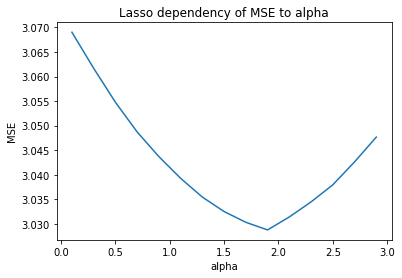

min error on alpha 1.9000000000000004


In [68]:
lambdas = np.arange(0.1, 3.0, 0.2)
errors = []
optimal_lambda = 0.1
prev_error = 10 ** 10

for i in lambdas:
    error = np.mean(-cross_val_score(Lasso(alpha=i).fit(X, y), X, y, cv=5, scoring='neg_mean_squared_error'))
    if error < prev_error:
        prev_error = error
        optimal_lambda = i
    errors.append(error)
plt.plot(lambdas, errors)
plt.title('Lasso dependency of MSE to alpha')
plt.ylabel('MSE')
plt.xlabel('alpha')
plt.show()
print(f"min error on alpha {optimal_lambda}")


**(0.5 балла) Обязательное задание 5:** Сделайте то же самое для L2-регуляризации:

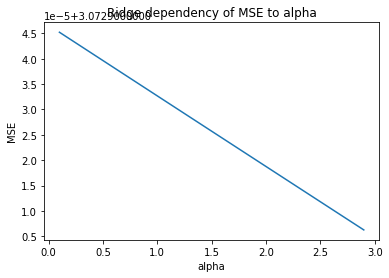

min error on alpha 2.900000000000001


In [69]:
### ваш код здесь
lambdas = np.arange(0.1, 3.0, 0.2)
errors = []
optimal_lambda = 0.1
prev_error = 10 ** 10
for i in lambdas:
    error = np.mean(-cross_val_score(Ridge(alpha=i).fit(X, y), X, y, cv=5, scoring='neg_mean_squared_error'))
    if error < prev_error:
        prev_error = error
        optimal_lambda = i
    errors.append(error)
plt.plot(lambdas, errors)
plt.title('Ridge dependency of MSE to alpha')
plt.ylabel('MSE')
plt.xlabel('alpha')
plt.show()
print(f"min error on alpha {optimal_lambda}")

Если всё было правильно, то данные манипуляции помогут немного улучшить качество вашей модели. Это поднимет вас на несколько мест в соревнованиях, или вашему работодателю даст побольше прибыли.

## P.S. meme

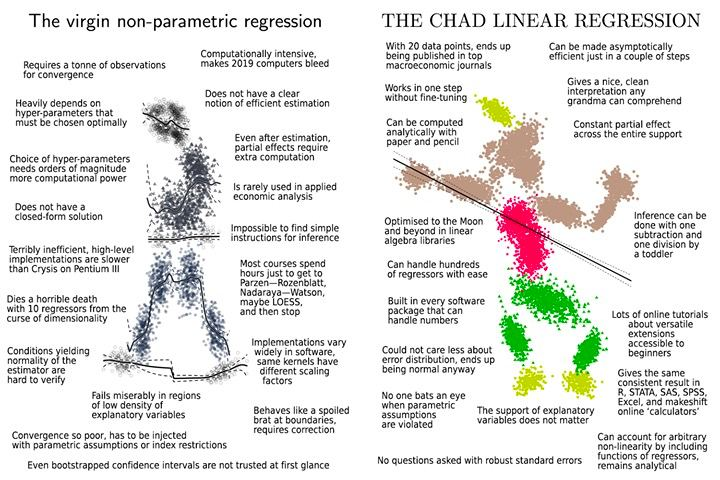

## Дополнительные материалы для самостоятельного изучения

* Визуальное представление основ линейной алгебры [здесь](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab). (рус. субтитры)

* Визуальное представление основ математического анализа [здесь](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr). (рус. субтитры)

# Основное домашнее задание (6 баллов + гешефт за улучшения)

In [70]:
# https://drive.google.com/file/d/1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu/view?usp=sharing
! gdown --id 1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu
To: /Users/apotekhin/repositories/Sample-ML-Repo/06. Overfittng problem/diabetes.data.csv
100%|██████████████████████████████████████| 18.5k/18.5k [00:00<00:00, 27.7MB/s]


Для домашнего задания вы используете другой датасет.

In [71]:
data = pd.read_csv('diabetes.data.csv', sep='\t')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


В датасете приводится информация о пациентах и их состоянии при заболевании диабетом. Описание признаков можно прочитать [здесь](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). Колонка Y - целевая переменная:

In [72]:
target = 'Y'
X = data.drop([target], axis=1)
y = data[target]

X.shape, y.shape

((442, 10), (442,))

**Ваша задача** - провести то же исследование, что и в датасете в самом начале (Sales ~ TV, Radio, Newspaper). В итоге, нужно получить модель линейной регрессии, качество которой надо вывести с помощью cross_val_score с метрикой MSE (тоже самое в общем).

**Целевая метрика - MSE**

За каждое достойное улучшение качества на cross_val_score будут доп. баллы. Не забудьте описать, что использовали, что получилось и нет, а также попробуйте понять почему. Побольше гуглите. 

Возможные улучшения:
* Нормализация данных: вычитаем из каждой колонки её среднее и делим на стандартное отклонение.
* Пробуйте убрать ненужные признаки.
* Можно перемножать некоторые признаки.
* Погуглите что-то вроде "improve linear regression".

В общем, представьте, что вы работаете датасаентистом, получаете *300K bucks*, а вам сказали, что нужно как можно лучше уметь предсказывать такие данные.

<img src="https://c.tenor.com/JZ1XdjdbHs8AAAAC/futurama-fry.gifhttps://c.tenor.com/3M8C_1GPijcAAAAC/master-gachi.gif">

In [73]:
# pip install drawdata

In [74]:
# from drawdata import draw_scatter
# draw_scatter()

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [76]:
data.isna().sum()

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

In [77]:
data.nunique()

AGE     58
SEX      2
BMI    163
BP     100
S1     141
S2     302
S3      63
S4      66
S5     184
S6      56
Y      214
dtype: int64

**На первый взгляд - вкусные данные, ни пропусков, ни строк, правда вот уникальных значений таргета почти что больше, чем у всех признаков...**

**Посмотрим на рапределения данных**

In [78]:
px.histogram(data['Y'], title='Distribution of target')

In [79]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=5)

row_count = 1
col_count = 1

for i in X.columns:
    fig.add_trace(go.Histogram(x=data[i], name=i), row=row_count, col=col_count)
    if col_count % 5 == 0:
        col_count = 1
        row_count += 1
    else:
        col_count += 1 
fig.update_layout(title_text="Distributions of features")


In [80]:
fig = make_subplots(rows=2, cols=5)

row_count = 1
col_count = 1

for i in X.columns:
    fig.add_trace(go.Box(x=data[i], y=y, name=i), row=row_count, col=col_count)
    if col_count % 5 == 0:
        col_count = 1
        row_count += 1
    else:
        col_count += 1 
fig.update_layout(title_text="Dependency of features to target")

<AxesSubplot:title={'center':'Correlation of features'}>

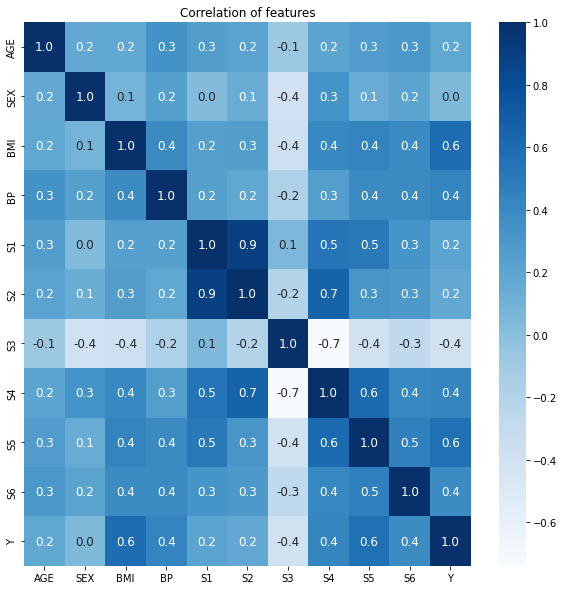

In [81]:
import seaborn as sns
correlation = data.corr()
plt.figure(figsize=(10,10))
plt.title("Correlation of features")
sns.heatmap(correlation, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Blues')

**Видим большой коофициент корреляции у S2 и S1, S3 и S4 признаков**

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
mean_squared_error(y_test, lr.predict(X_test))

2821.750981001311

**Попробуем отмаштабировать данные**

In [83]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [84]:
lr_sc = LinearRegression().fit(X_train_sc, y_train)
mean_squared_error(y_test, lr.predict(X_test))

2821.750981001311

**Ничего не поменялось, нормализовать нет смысла**

In [85]:
def get_reg_params(estimator, X, y):
    lambdas = np.arange(0.0, 3.0, 0.1)
    errors = []
    optimal_lambda = 0.1
    prev_error = 10 ** 10
    best_fold_size = 2
    for j in range(2, 15):
        for i in lambdas:
            error = np.mean(-cross_val_score(estimator(alpha=i).fit(X, y), X, y, cv=j, scoring='neg_mean_squared_error'))
            if error < prev_error:
                prev_error = error
                optimal_lambda = i
                best_fold_size = j
            errors.append(error)
    return [error, optimal_lambda, best_fold_size]

**Попробуем поперебирать фолды и найти оптимальные параметры для регуляризации**

In [86]:
error, optimal_lambda, best_fold_size = get_reg_params(Lasso, X, y)
print(f"For Lasso min error is {error} on alpha {optimal_lambda} with fold size {best_fold_size}")

For Lasso min error is 3148.1349490479984 on alpha 0.0 with fold size 4


In [87]:
error, optimal_lambda, best_fold_size = get_reg_params(Ridge, X, y)
print(f"For Ridge min error is {error} on alpha {optimal_lambda} with fold size {best_fold_size}")

For Ridge min error is 2991.224119183958 on alpha 0.0 with fold size 4


**Удручает, смысла в регуляризации нет, попробуем удалить один коррелирующий  признак**

In [88]:
for i in ["S1", "S2", "S3", "S4"]:
    error, optimal_lambda, best_fold_size = get_reg_params(Lasso, X.drop(i, axis=1), y)
    print(f"For Lasso without {i} column min error is {error} on alpha {optimal_lambda} with fold size {best_fold_size}")
    error, optimal_lambda, best_fold_size = get_reg_params(Ridge, X.drop(i, axis=1), y)
    print(f"For Ridge without {i} column min error is {error} on alpha {optimal_lambda} with fold size {best_fold_size} ")

For Lasso without S1 column min error is 3068.9242827699995 on alpha 0.0 with fold size 4
For Ridge without S1 column min error is 3001.8569510898024 on alpha 1.7000000000000002 with fold size 4 
For Lasso without S2 column min error is 3077.0796720668886 on alpha 0.0 with fold size 4
For Ridge without S2 column min error is 2990.39699559273 on alpha 1.9000000000000001 with fold size 4 
For Lasso without S3 column min error is 3110.8145533253096 on alpha 0.0 with fold size 4
For Ridge without S3 column min error is 2973.5899949110208 on alpha 0.0 with fold size 4 
For Lasso without S4 column min error is 3148.1341728268703 on alpha 0.0 with fold size 4
For Ridge without S4 column min error is 2990.107398744397 on alpha 0.2 with fold size 4 


**А теперь возьмём и к лучшему результату попробуем убрать ещё один**

In [89]:
for i in ["S1", "S2", "S3"]:
    error, optimal_lambda, best_fold_size = get_reg_params(Lasso, X.drop([i, "S4"], axis=1), y)
    print(f"For Lasso without {i} column min error is {error} on alpha {optimal_lambda} with fold size {best_fold_size}")
    error, optimal_lambda, best_fold_size = get_reg_params(Ridge, X.drop([i, "S4"], axis=1), y)
    print(f"For Ridge without {i} column min error is {error} on alpha {optimal_lambda} with fold size {best_fold_size} ")

For Lasso without S1 column min error is 3068.9325630191656 on alpha 0.0 with fold size 4
For Ridge without S1 column min error is 2993.1644263666667 on alpha 0.7000000000000001 with fold size 4 
For Lasso without S2 column min error is 3077.079686888524 on alpha 0.0 with fold size 4
For Ridge without S2 column min error is 2986.6393932010315 on alpha 0.2 with fold size 4 
For Lasso without S3 column min error is 3107.4520181390367 on alpha 0.0 with fold size 4
For Ridge without S3 column min error is 2971.31120733453 on alpha 0.0 with fold size 4 


**Результат хуже**

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(["S4"], axis=1), y, test_size=0.3, random_state=42)

lr = Ridge(alpha=0.0).fit(X_train, y_train)
mean_squared_error(y_test, lr.predict(X_test))

2784.448154434847

**Смогли немного снизить значение метрики, попробуем закодировать признак пола пациентов**

In [91]:
X_sex_dummies = pd.get_dummies(X.SEX)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([X.drop(["S4", 'SEX'], axis=1), X_sex_dummies], axis=1), y, test_size=0.3, random_state=42)

In [93]:
lr = Ridge(alpha=0.2).fit(X_train, y_train)
mean_squared_error(y_test, lr.predict(X_test))

2786.9157100541606

**Стало... хуже. Получим финальный результат**

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(["S4"], axis=1), y, test_size=0.3, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print("Result for LinearRegression – ", mean_squared_error(y_test, lr.predict(X_test)))

Result for LinearRegression –  2784.4481544348455


In [95]:
lr = Ridge(alpha=0.0).fit(X_train, y_train)
print("Result for Ridge – ", mean_squared_error(y_test, lr.predict(X_test)))

Result for Ridge –  2784.448154434847


**Итак, мы попробовали маштабировать признаки, удалять признаки с высоким коофициентом корреляции, кодировать категориальные признаки и подбирать оптимальные разбиения выборки с параметром alpha для L1 и L2 регуляризации, что позволило улучшить исходное значение целевой метрики**